In [20]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# loading data
df = pd.read_csv('milknew.csv')

In [22]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [23]:
df.shape

(1059, 8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [25]:
## Missing value check in data
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Text(0.5, 1.0, 'Distribution of dependent variable')

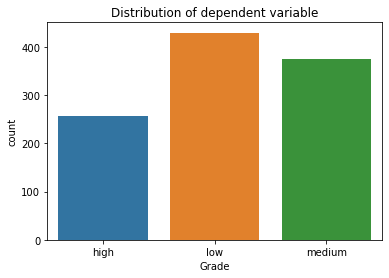

In [26]:
## distribution of dependent variable
sns.countplot(df.Grade)
plt.title('Distribution of dependent variable')

In [27]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

<Figure size 720x1152 with 0 Axes>

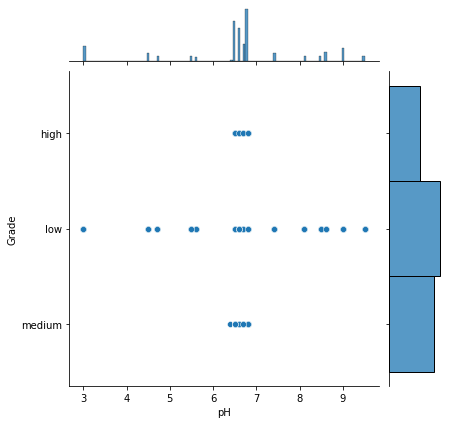

In [28]:
fig = plt.figure(figsize=(10,16))
sns.jointplot(x = df['pH'],y=df['Grade'])

<Figure size 720x1152 with 0 Axes>

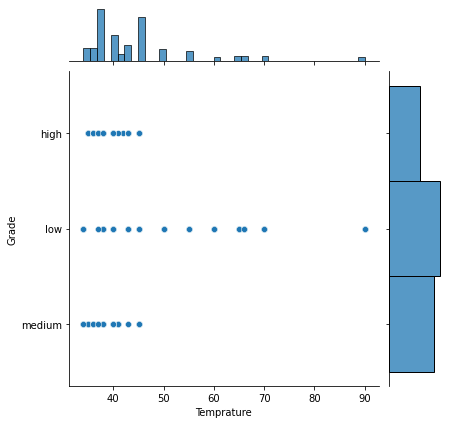

In [30]:
fig = plt.figure(figsize=(10,16))
sns.jointplot(x = df['Temprature'],y=df['Grade'])


<Figure size 720x1152 with 0 Axes>

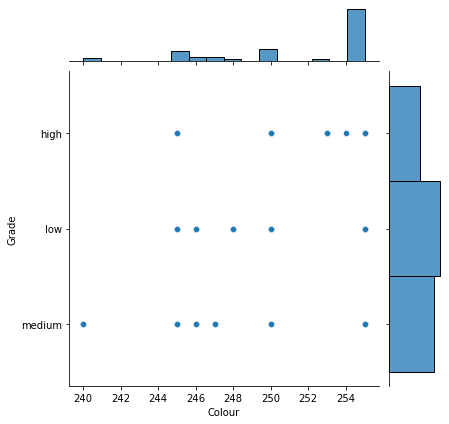

In [38]:
fig = plt.figure(figsize=(10,16))
sns.jointplot(x = df['Colour'],y=df['Grade'])

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])

Text(0.5, 1.0, 'Correlation Matrix')

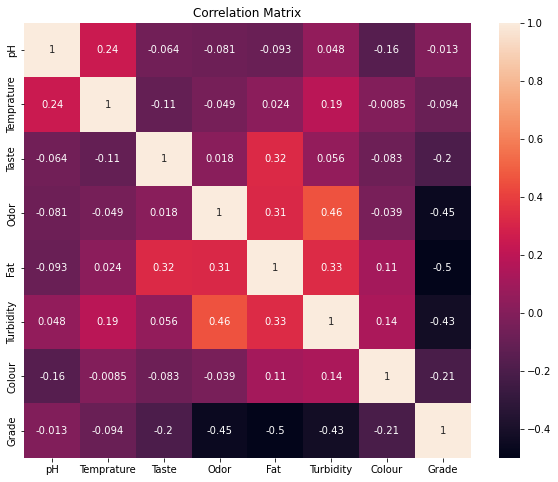

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

In [41]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
### Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [42]:
from sklearn.decomposition  import PCA
pca = PCA(n_components =2)
pca.fit(x)
x_pca = pca.transform(x)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
x_train, x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.25,random_state=40)

In [49]:
model_params = {
    'svm': {
        'model':svm.SVC(gamma = 'auto'),'params':{
            'C': [1,10,20],
            'kernel':['rbf','linear']
        }
    },'randomforest':{
        'model':RandomForestClassifier(),'params':{
            'n_estimators':[3,10],
            'max_depth': [3,8],
            'min_samples_split':[2,7],
            'min_samples_leaf':[2,6],
            'max_features':[3,9]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),'params':{
            'C':[1,5]
        }
    }
}

In [51]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=10)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
dfinal = pd.DataFrame(scores,columns = ['model','best_score','best_params'])

In [52]:
dfinal

,model,best_score,best_params
0,svm,0.929415,"{'C': 20, 'kernel': 'rbf'}"
1,randomforest,0.976123,"{'max_depth': 8, 'max_features': 9, 'min_sampl..."
2,logistic_regression,0.618449,{'C': 1}


### Logistic Regression

Accuracy with logistic : 64.90566037735849
              precision    recall  f1-score   support

           0       0.42      0.28      0.34        53
           1       0.65      0.60      0.63       116
           2       0.71      0.91      0.80        96

    accuracy                           0.65       265
   macro avg       0.59      0.60      0.59       265
weighted avg       0.63      0.65      0.63       265

AxesSubplot(0.125,0.125;0.62x0.755)


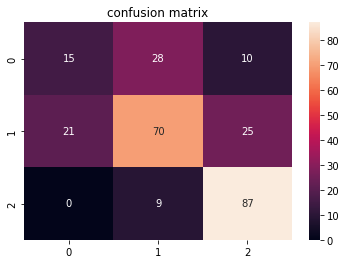

In [67]:
clf = LogisticRegression(C = 1)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
precision = metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy with logistic : {}".format(precision))
print(classification_report(y_test,y_pred))
plt.title('confusion matrix')
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

### Random Forest Classifier

Accuracy with RandomForest : 98.49056603773585
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.98      0.98      0.98       116
           2       1.00      0.99      0.99        96

    accuracy                           0.98       265
   macro avg       0.98      0.98      0.98       265
weighted avg       0.99      0.98      0.98       265

AxesSubplot(0.125,0.125;0.62x0.755)


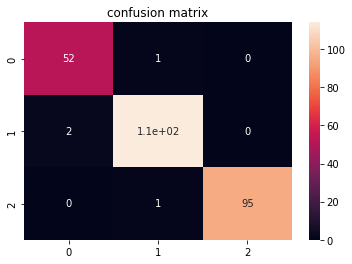

In [68]:
clf = RandomForestClassifier(max_depth= 8,
 max_features= 9,
 min_samples_leaf= 2,
 min_samples_split= 7,
 n_estimators= 3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
precision = metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy with RandomForest : {}".format(precision))
print(classification_report(y_test,y_pred))
plt.title('confusion matrix')
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

### Support vector classifier

Accuracy with svc : 85.28301886792453
              precision    recall  f1-score   support

           0       0.63      0.98      0.76        53
           1       0.99      0.81      0.89       116
           2       0.92      0.83      0.87        96

    accuracy                           0.85       265
   macro avg       0.85      0.87      0.84       265
weighted avg       0.89      0.85      0.86       265

AxesSubplot(0.125,0.125;0.62x0.755)


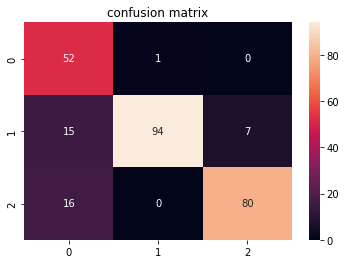

In [69]:
clf = SVC(C=20,kernel='rbf')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
precision = metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy with svc : {}".format(precision))
print(classification_report(y_test,y_pred))
plt.title('confusion matrix')
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))